# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [52]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
import scipy.stats as stats

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [53]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

The features descriptions are this:

 - FRESH: annual spending (m.u.) on fresh products (Continuous);
 - MILK: annual spending (m.u.) on milk products (Continuous);
 - GROCERY: annual spending (m.u.)on grocery products (Continuous);
 - FROZEN: annual spending (m.u.)on frozen products (Continuous)
 - DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
 - DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
 - CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
 - REGION: customers Region - Lisnon, Oporto or Other (Nominal)

In [54]:
# Your code here:
customers.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [55]:
customers.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

Columns Region and Channel seem to be categorical variables, so, they could be converted to dummies.

In [56]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

No null data to remove.

In [57]:
customers_cons = add_constant(customers)
pd.Series([vif(customers_cons.values, i) for i in range(customers_cons.shape[1])], index=customers_cons.columns)

const               23.238869
Channel              1.791911
Region               1.014571
Fresh                1.206674
Milk                 2.566544
Grocery              8.844377
Frozen               1.353524
Detergents_Paper     8.379030
Delicassen           1.524167
dtype: float64

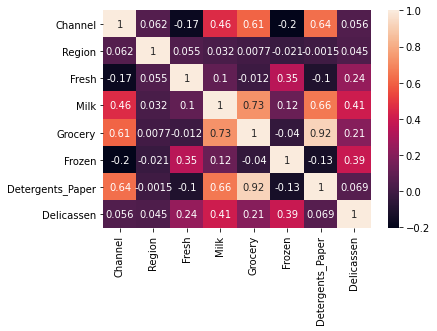

In [58]:
sns.heatmap(customers.corr(), annot=True);

There are two columns with a higher correlation than normal: Grocery and Detergents_Paper; and although is less than the last two mentioned, Milk has also a high variance inflation factor.

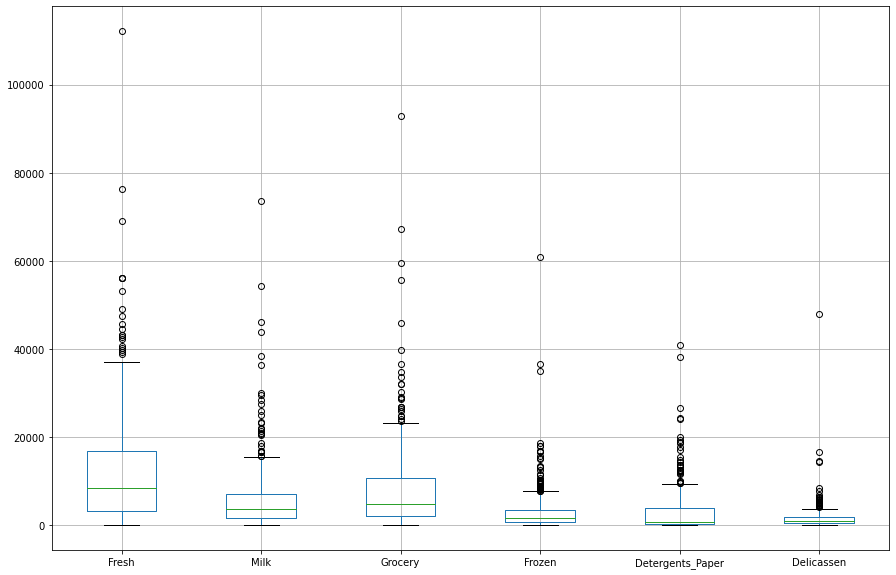

In [59]:
customers.boxplot(column=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], figsize=(15,10));

All the columns have some outliers that could be romeved.

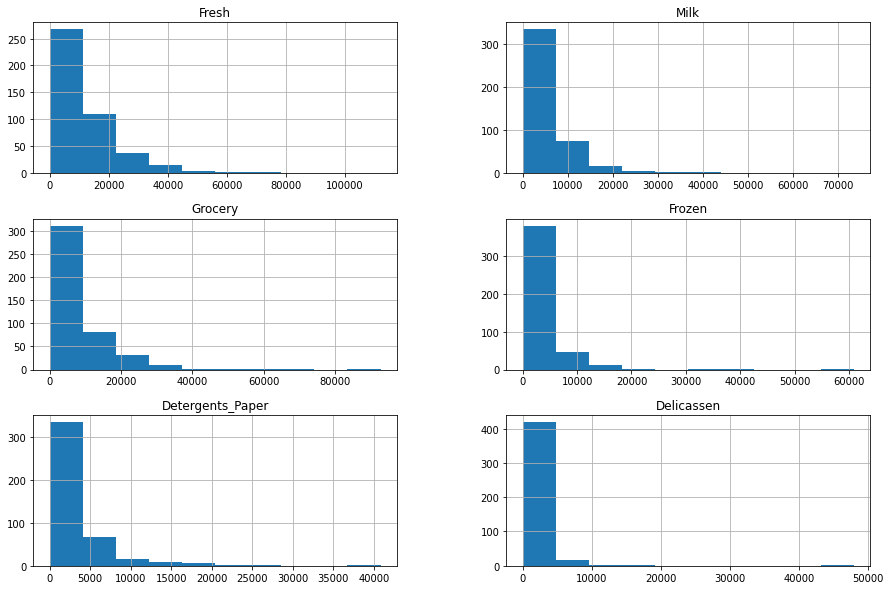

In [60]:
customers.hist(column=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], figsize=(15,10));

All the columns' distributions are right skewed, which confirms the idea that this data has some outliers.

In [148]:
for e in range(321,327):
    print(e)

321
322
323
324
325
326


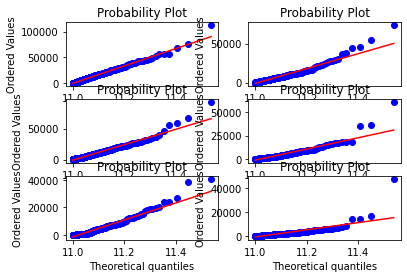

In [155]:
# Your code here
for col, axs in zip(list(customers.iloc[:,2:]), range(321,327)):
    plt.subplot(axs)
    stats.probplot(customers[col], dist='pareto', sparams=(15, 10), plot=plt)

Nearly all the columns follow the pareto principle.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [62]:
q1 = customers.quantile(0.25)
q3 = customers.quantile(0.75)

iqr = q3 - q1
iqr

Channel                 1.00
Region                  1.00
Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicassen           1412.00
dtype: float64

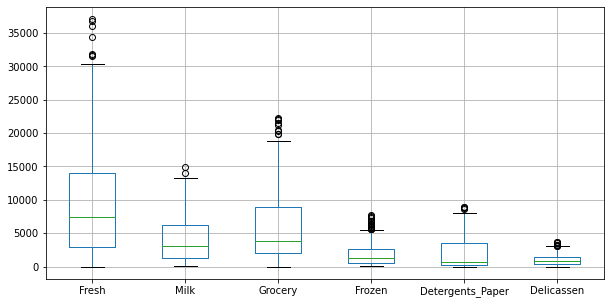

In [63]:
customers_clean = customers[~((customers < (q1 - 1.5 * iqr)) |(customers > (q3 + 1.5 * iqr))).any(axis=1)]
customers_clean.boxplot(column=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], figsize=(10,5));

In [64]:
# Your code here
#customers_clean.drop(columns=['Detergents_Paper'], inplace=True)
customers_clean = pd.get_dummies(customers_clean, columns=['Channel', 'Region'])

In [65]:
customers_clean_c = customers_clean.copy()
customers_clean.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
5,9413,8259,5126,666,1795,1451,0,1,0,0,1
6,12126,3199,6975,480,3140,545,0,1,0,0,1


In order to clean the data, I have converted the categorical variables to dummies, remove the outliers from the features and dropped the Detergens_Paper feature, as there was a high correlation between it and the Grocery feature.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [15]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
customers_scale = StandardScaler().fit(customers).transform(customers)
customers_scale_cl = StandardScaler().fit(customers_clean).transform(customers_clean)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [16]:
# Your code here:
from sklearn.cluster import KMeans

kmeans = KMeans().fit(customers_scale)
kmeans_cl = KMeans().fit(customers_scale_cl)

In [17]:
customers['labels'] = kmeans.labels_
customers_clean['labels'] = kmeans_cl.labels_

Count the values in `labels`.

In [18]:
# Your code here:
customers.labels.value_counts()

0    175
6     92
2     87
3     41
1     36
5      6
7      2
4      1
Name: labels, dtype: int64

In [19]:
customers_clean.labels.value_counts()

4    83
2    53
7    44
1    44
0    38
5    37
3    22
6    11
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [20]:
# Your code here
from sklearn.cluster import DBSCAN

clustering = DBSCAN().fit(customers_scale)
clustering_cl = DBSCAN().fit(customers_scale_cl)

In [21]:
customers['labels_DBSCAN']  = clustering.labels_
customers_clean['labels_DBSCAN']  = clustering_cl.labels_

Count the values in `labels_DBSCAN`.

In [22]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

In [23]:
customers_clean['labels_DBSCAN'].value_counts()

-1    308
 0     24
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


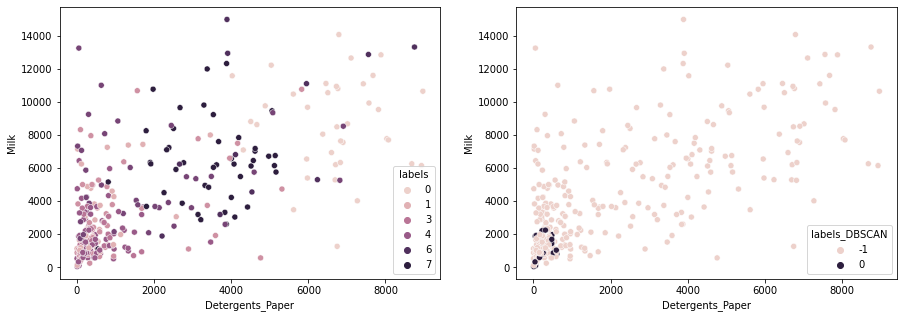

In [47]:
# Your code here:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(customers_clean.Detergents_Paper, customers_clean.Milk, hue=customers_clean.labels, ax=ax[0])
sns.scatterplot(customers_clean.Detergents_Paper, customers_clean.Milk, hue=customers_clean.labels_DBSCAN, ax=ax[1]);

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


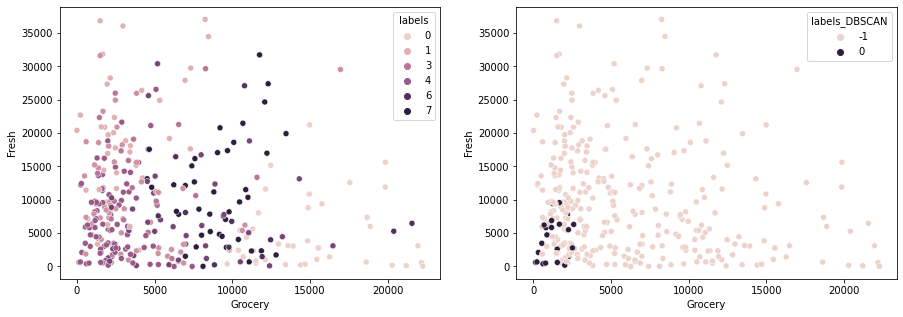

In [48]:
# Your code here:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(customers_clean.Grocery, customers_clean.Fresh, hue=customers_clean.labels, ax=ax[0])
sns.scatterplot(customers_clean.Grocery, customers_clean.Fresh, hue=customers_clean.labels_DBSCAN, ax=ax[1]);

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


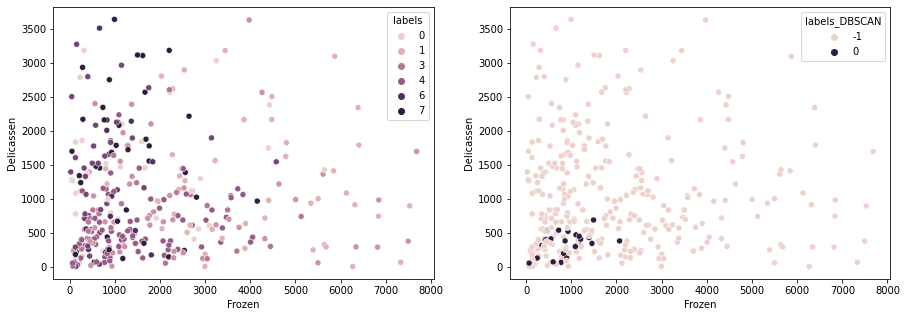

In [49]:
# Your code here:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(customers_clean.Frozen, customers_clean.Delicassen, hue=customers_clean.labels, ax=ax[0])
sns.scatterplot(customers_clean.Frozen, customers_clean.Delicassen, hue=customers_clean.labels_DBSCAN, ax=ax[1]);

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [39]:
# Your code here:
customers_clean.iloc[:,[0,1,2,3,4,5,11]].groupby(['labels']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
0,4923.526316,8628.552632,15089.394737,1415.157895,6650.578947,1229.710526
1,17821.363636,2847.954545,3264.840909,4098.590909,562.204545,1219.113636
2,9727.773585,3014.094340,3694.000000,2421.773585,1054.584906,877.830189
3,11707.272727,1871.181818,4031.363636,2100.863636,486.590909,879.318182
4,7033.180723,1692.939759,2267.192771,1414.253012,442.626506,550.686747
5,7183.513514,5315.000000,6549.945946,780.486486,1798.540541,1318.621622
6,7847.363636,8475.000000,11303.090909,1033.727273,4866.272727,1154.181818
7,11125.113636,6327.681818,8961.886364,1186.659091,3397.954545,1456.363636


In [40]:
customers_clean.iloc[:,[0,1,2,3,4,5,12]].groupby(['labels_DBSCAN']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels_DBSCAN,,,,,,
-1,9952.808442,4337.454545,6223.438312,1942.230519,2093.649351,1070.172078
0,4344.625000,1124.333333,1411.875000,846.875000,230.666667,329.125000


Which algorithm appears to perform better?

Seems that K-Means performs better for this data, as it clusters the data in 8 labels, whilst DBSCAN is able to make just 2 clusters.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

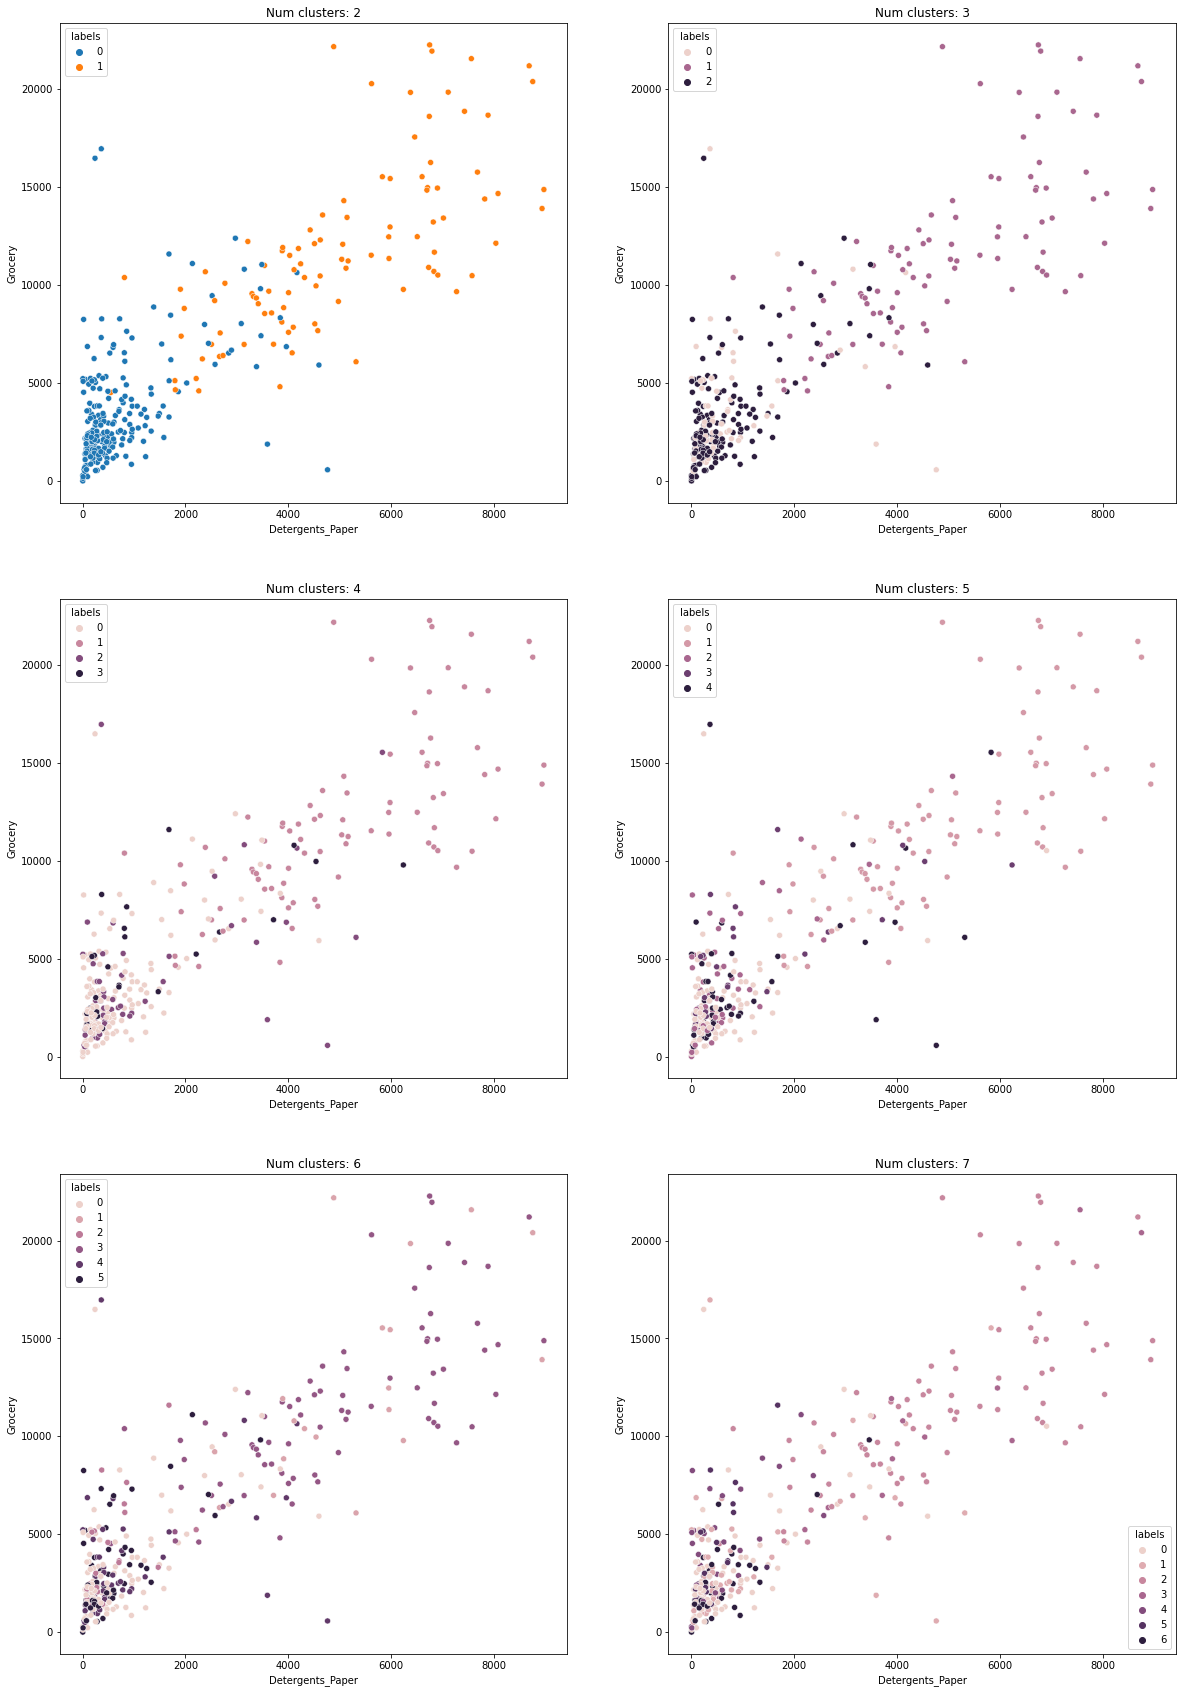

In [87]:
# Your code here
fig, ax = plt.subplots(3,2, figsize=(20,30))
ax_indexx = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]

for n_cluster, ax_index in zip(range(2,8), ax_indexx):
    customers_copy = customers_clean_c.copy()
    
    customers_scale_copy = StandardScaler().fit(customers_copy).transform(customers_copy)
    kmeans = KMeans(n_clusters=n_cluster).fit(customers_scale_copy)
    
    customers_copy['labels'] = kmeans.labels_
    
    ax[ax_index].set_title(f"Num clusters: {n_cluster}")
    sns.scatterplot(customers_copy['Detergents_Paper'], 
                    customers_copy['Grocery'], 
                    hue=customers_copy.labels, 
                    ax=ax[ax_index])

It seems like K-Means works great with two clusters for this data. After that, data gets more and more disperse, and some clusters oppose to others.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


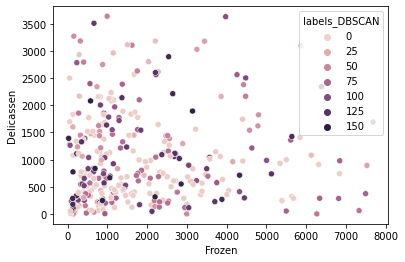

In [142]:
customers_copy = customers_clean_c.copy()
    
customers_scale_copy = StandardScaler().fit(customers_copy).transform(customers_copy)
clustering = DBSCAN(eps=1, min_samples=1).fit(customers_scale_copy)

customers_copy['labels_DBSCAN'] = clustering.labels_

sns.scatterplot(customers_copy['Frozen'], 
                    customers_copy['Delicassen'], 
                    hue=customers_copy.labels_DBSCAN);

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


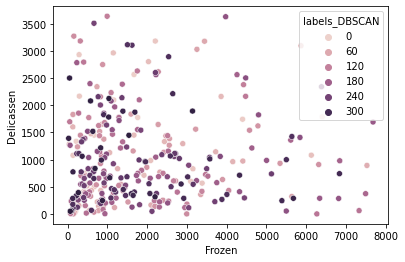

In [143]:
customers_copy = customers_clean_c.copy()
    
customers_scale_copy = StandardScaler().fit(customers_copy).transform(customers_copy)
clustering = DBSCAN(eps=.01, min_samples=1).fit(customers_scale_copy)

customers_copy['labels_DBSCAN'] = clustering.labels_

sns.scatterplot(customers_copy['Frozen'], 
                    customers_copy['Delicassen'], 
                    hue=customers_copy.labels_DBSCAN);